In [3]:
%matplotlib inline

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io

In [ ]:
#https://en.wikipedia.org/wiki/Rank_correlation
#https://stats.stackexchange.com/questions/306771/is-there-any-way-to-compute-pearsons-correlation-between-two-strings

In [57]:
#Current Index Participants

current_participants = pd.read_csv('data/Sofix_Metodology_Current_Participants.csv', sep=';', encoding='utf-8')
current_participants =current_participants[['code', 'emission']]
# current_participants = current_participants[~pd.isna(current_participants['Текущ Софикс'])]
current_participants

,code,emission
0,SFA,Софарма АД-София
1,ATER,Адванс Терафонд АДСИЦ-София
2,DUH,Доверие Обединен Холдинг АД-София
3,CHIM,Химимпорт АД-София
4,BREF,Фонд за недвижими имоти България АДСИЦ-София
5,FIB,ТБ Първа Инвестиционна Банка АД-София
6,EUBG,Еврохолд България АД-София
7,EAC,Елана Агрокредит АД-София
8,HVAR,Холдинг Варна АД-Варна
9,MONB,Монбат АД-София


In [58]:
#Model Result

model_results = pd.read_csv('data/Sofix_Metodology_Results_Model.csv', sep=';', encoding='utf-8')
model_results=model_results.sort_values(by=['rank'],ascending=True)
model_results = model_results.iloc[:15]
model_results

,code,emmision,free_float,count_deals,weekly_volume,spread,rank,Фрий-флоут,сделки,оборот,спред,Текущ Софикс
0,SFA,Софарма АД-София,160642033.0,1449.0,160023.0,0.0542,7.0,1.0,3.0,1.0,2.0,SFA
1,ATER,Адванс Терафонд АДСИЦ-София,102599719.0,1344.0,69618.0,0.0444,15.0,3.0,6.0,5.0,1.0,ATER
2,DUH,Доверие Обединен Холдинг АД-София,55733918.0,2099.0,127352.0,0.0649,16.0,8.0,1.0,2.0,5.0,DUH
4,CHIM,Химимпорт АД-София,51940098.0,1813.0,53972.0,0.0891,26.0,10.0,2.0,8.0,6.0,CHIM
5,BREF,Фонд за недвижими имоти България АДСИЦ-София,49219319.0,1164.0,64743.0,0.0601,30.0,11.0,8.0,7.0,4.0,BREF
6,FIB,ТБ Първа Инвестиционна Банка АД-София,29535000.0,1354.0,52392.0,0.0982,37.0,15.0,5.0,9.0,8.0,FIB
7,EUBG,Еврохолд България АД-София,146648068.0,655.0,105903.0,0.2007,38.0,2.0,12.0,3.0,21.0,EUBG
8,ALB,Албена АД-к.к. Албена,35806484.0,693.0,65136.0,0.1407,44.0,13.0,11.0,6.0,14.0,NaN
9,EAC,Елана Агрокредит АД-София,27599413.0,541.0,30793.0,0.0567,45.0,16.0,13.0,13.0,3.0,EAC
10,HVAR,Холдинг Варна АД-Варна,78471400.0,263.0,15580.0,0.1080,48.0,4.0,18.0,17.0,9.0,HVAR


In [59]:
#Real Result

real_results = pd.read_csv('data/Sofix_Metodology_Results_RealData.csv', header = None, encoding='utf-8')
real_results.columns=['code','emmision','free_float','weekly_volume','count_deals','spread']
real_results

,code,emmision,free_float,weekly_volume,count_deals,spread
0,SFA,Софарма АД-София,156588249,156810,1473,0.034681
1,ATER,Адванс Терафонд АДСИЦ-София,102428973,73828,1414,0.026616
2,DUH,Доверие Обединен Холдинг АД-София,55730526,122448,2121,0.044712
3,A4L,Алтерко АД-София,59270757,83768,2066,0.056602
4,CHIM,Химимпорт АД-София,51731241,53054,1823,0.049303
5,BREF,Фонд за недвижими имоти България АДСИЦ-София,49426059,68873,1174,0.037336
6,EUBG,Еврохолд България АД-София,150423645,99419,659,0.127798
7,FIB,ТБ Първа Инвестиционна Банка АД-София,29541600,51497,1366,0.061761
8,ALB,Албена АД-к.к. Албена,35810505,65055,698,0.065323
9,EAC,Елана Агрокредит АД-София,27765300,27711,548,0.032696


In [60]:
# IN-OUT 
 
in_real = set(real_results['code'].tolist())
in_model = set(model_results['code'].tolist())
current = set(current_participants['code'].tolist())

print("Според модела в състава на индекса влизат:", in_model - current)
print("Според модела от състава на индекса излизат:",  current - in_model)
print("Според модела в състава на индекса остават:",  current & in_model)
print()
print("Реално в състава на индекса влизат:", in_real - current)
print("Реално от състава на индекса излизат:",  current - in_real)
print("Реално в състава на индекса остават:",  current & in_real)
print()
print("Разлики в модела и реалната класация",  in_real - in_model, 'Брой разлики: ',len(in_real - in_model))
print("Познат брой емисии в модела и реалната класация",  in_real & in_model,  'Брой попадения: ',len(in_real &  in_model))
print()
print(len(in_real - in_model)/15)
print("Коефициент познаваемост: ", len(in_real & in_model)/15)


Според модела в състава на индекса влизат: {'MSH', 'ALB'}
Според модела от състава на индекса излизат: {'SPH', 'MONB'}
Според модела в състава на индекса остават: {'EUBG', 'BREF', 'HVAR', 'SGH', 'SFA', 'FIB', 'CHIM', 'T57', 'DUH', 'GR6', 'ATER', 'EAC', 'CCB'}

Реално в състава на индекса влизат: {'A4L', 'ALB', 'TBS'}
Реално от състава на индекса излизат: {'T57', 'SPH', 'MONB'}
Реално в състава на индекса остават: {'EUBG', 'BREF', 'HVAR', 'SGH', 'SFA', 'FIB', 'CHIM', 'ATER', 'DUH', 'GR6', 'EAC', 'CCB'}

Разлики в модела и реалната класация {'A4L', 'TBS'} Брой разлики:  2
Познат брой емисии в модела и реалната класация {'EUBG', 'BREF', 'ALB', 'HVAR', 'SGH', 'SFA', 'FIB', 'CHIM', 'ATER', 'DUH', 'GR6', 'EAC', 'CCB'} Брой попадения:  13

0.13333333333333333
Коефициент познаваемост:  0.8666666666666667


In [9]:
print(model_results.columns)

Index(['code', 'emmision', 'free_float', 'count_deals', 'weekly_volume',
       'spread', 'rank', 'Фрий-флоут', 'сделки ', 'оборот', 'спред',
       'Текущ Софикс'],
      dtype='object')


In [10]:
# count of deals
in_real_cd = real_results[['code','count_deals']]
in_model_cd = model_results[['code','count_deals']]
emision = pd.DataFrame(in_real & in_model)
emision.columns=['code']
emision = emision.merge(in_real_cd, on="code", how="left")
emision = emision.merge(in_model_cd, on="code", how="left")
emision.columns=['code','real_deals','model_deals']
emision['differenses'] = emision.real_deals - emision.model_deals
emision

,code,real_deals,model_deals,differenses
0,EUBG,659,655.0,4.0
1,BREF,1174,1164.0,10.0
2,ALB,698,693.0,5.0
3,HVAR,263,263.0,0.0
4,SGH,878,870.0,8.0
5,SFA,1473,1449.0,24.0
6,FIB,1366,1354.0,12.0
7,CHIM,1823,1813.0,10.0
8,ATER,1414,1344.0,70.0
9,DUH,2121,2099.0,22.0


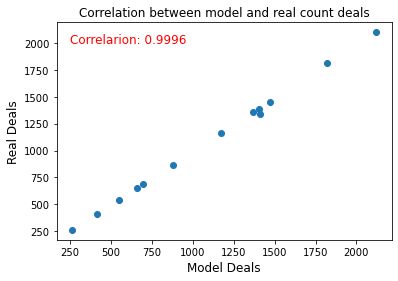

In [36]:
correlation = emision.real_deals.corr(emision.model_deals)
text_box_info = f'Correlarion: {correlation:.4f}'
plt.scatter(emision.real_deals,emision.model_deals )
plt.title('Correlation between model and real count deals')
plt.ylabel('Model Deals', fontsize=12)
plt.xlabel('Real Deals', fontsize=12)
plt.text(250,2000,text_box_info, fontsize=12, c = 'r')
plt.show()

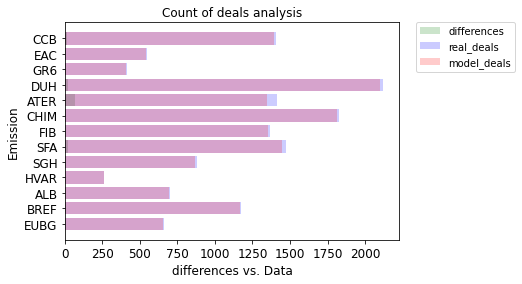

In [39]:
codies = emision.code
differenses = np.array(emision.differenses)
real_deals= np.array(emision.real_deals)
model_deals= np.array(emision.model_deals)
# plt.barh(x, y, color="green", label=combined_label)
plt.barh(codies, differenses, color="green",label='differences', alpha = 0.2)
plt.barh(codies, real_deals, color="blue", label='real_deals' , alpha = 0.2)
plt.barh(codies, model_deals, color="red", label='model_deals' ,alpha = 0.2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Count of deals analysis')
plt.ylabel('Emission', fontsize=12)
plt.xlabel('differences vs. Data', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

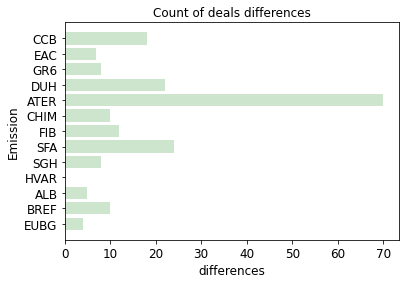

In [38]:
codies = emision.code
differenses = np.array(emision.differenses)
plt.barh(codies, differenses, color="green", alpha = 0.2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Count of deals differences')
plt.ylabel('Emission', fontsize=12)
plt.xlabel('differences', fontsize=12)

plt.show()

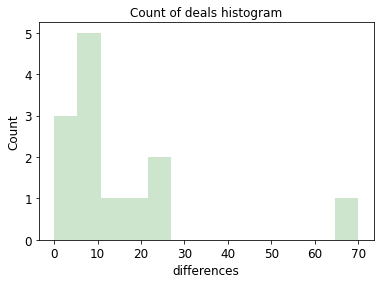

In [92]:
codies = emision.code
differenses = np.array(emision.differenses)
plt.hist(differenses, bins = 13, color="green", alpha = 0.2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Count of deals histogram')
plt.ylabel('Count', fontsize=12)
plt.xlabel('differences', fontsize=12)
#хистограмите показват, че отклоненията на модела от 
#реалния резултат са всички по-големи от 0 и следователно модела подценява този показател
plt.show()

In [164]:
emision.differenses.mean()

15.23076923076923

In [165]:
emision.differenses.median()

10.0

In [166]:
emision.differenses.std()

17.865953870205413

In [167]:
emision.differenses.sum()
# Вероятно не е обхванат един ден като са обработвани данните от инфосток

198.0

In [171]:
emision.differenses.mean()/emision.real_deals.mean()
#около 1.4% отклонение

0.013901565681387349

In [61]:
# weekly_volume
in_real_v = real_results[['code','weekly_volume']]
in_model_v = model_results[['code','weekly_volume']]
emision_v = pd.DataFrame(in_real & in_model)
emision_v.columns=['code']
emision_v = emision_v.merge(in_real_v, on="code", how="left")
emision_v = emision_v.merge(in_model_v, on="code", how="left")
emision_v.columns=['code','real_volume','model_volume']
emision_v['differenses'] = emision_v.real_volume - emision_v.model_volume
emision_v

,code,real_volume,model_volume,differenses
0,EUBG,99419,105903.0,-6484.0
1,BREF,68873,64743.0,4130.0
2,ALB,65055,65136.0,-81.0
3,HVAR,15416,15580.0,-164.0
4,SGH,41926,51564.0,-9638.0
5,SFA,156810,160023.0,-3213.0
6,FIB,51497,52392.0,-895.0
7,CHIM,53054,53972.0,-918.0
8,ATER,73828,69618.0,4210.0
9,DUH,122448,127352.0,-4904.0


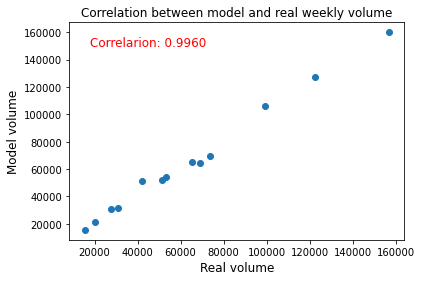

In [95]:
correlation = emision_v.real_volume.corr(emision_v.model_volume)
text_box_info = f'Correlarion: {correlation:.4f}'
plt.scatter(emision_v.real_volume,emision_v.model_volume )
plt.title('Correlation between model and real weekly volume')
plt.ylabel('Model volume', fontsize=12)
plt.xlabel('Real volume', fontsize=12)
plt.text(18000,150000,text_box_info, fontsize=12, c = 'r')
plt.show()

In [50]:
emision_v.differenses.mean(),  emision_v.differenses.median(), emision_v.differenses.std()

(-1756.0, -918.0, 3844.2594432044602)

In [51]:
emision_v.differenses.sum()
# Да проверя как борсата отчита непълна седмица при началния и крайния период - взема данните за цялата седмица
# или данните само за дните , които се падат в седмицата.

-22828.0

In [63]:
emision_v.differenses.mean()/emision_v.real_volume.mean()
#около 2,76% отклонение

-0.027591808515653047

In [64]:
# free_float
in_real_f = real_results[['code','free_float']]
in_model_f = model_results[['code','free_float']]
emision_f = pd.DataFrame(in_real & in_model)
emision_f.columns=['code']
emision_f = emision_f.merge(in_real_f, on="code", how="left")
emision_f = emision_f.merge(in_model_f, on="code", how="left")
emision_f.columns=['code','real_free_float','model_free_float']
# emision_f['differenses'] = emision_f.real_free_float - emision_f.model_free_float
emision_f.dtypes


code                 object
real_free_float       int64
model_free_float    float64
dtype: object

In [65]:
emision_f.real_free_float.apply ( lambda x: float ( x ) )

0     150423645.0
1      49426059.0
2      35810505.0
3      78542137.0
4      17081939.0
5     156588249.0
6      29541600.0
7      51731241.0
8     102428973.0
9      55730526.0
10     65664728.0
11     27765300.0
12     22450644.0
Name: real_free_float, dtype: float64

In [66]:
emision_f['differenses'] = emision_f.real_free_float - emision_f.model_free_float
emision_f

,code,real_free_float,model_free_float,differenses
0,EUBG,150423645,146648068.0,3775577.0
1,BREF,49426059,49219319.0,206740.0
2,ALB,35810505,35806484.0,4021.0
3,HVAR,78542137,78471400.0,70737.0
4,SGH,17081939,17188430.0,-106491.0
5,SFA,156588249,160642033.0,-4053784.0
6,FIB,29541600,29535000.0,6600.0
7,CHIM,51731241,51940098.0,-208857.0
8,ATER,102428973,102599719.0,-170746.0
9,DUH,55730526,55733918.0,-3392.0


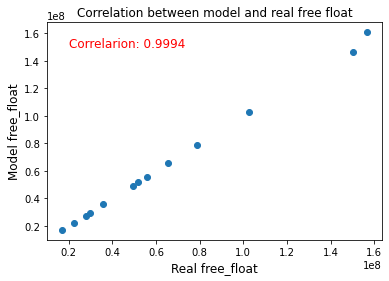

In [94]:
correlation = emision_f.real_free_float.corr(emision_f.model_free_float)
text_box_info = f'Correlarion: {correlation:.4f}'
plt.scatter(emision_f.real_free_float,emision_f.model_free_float )
plt.title('Correlation between model and real free float')
plt.ylabel('Model free_float', fontsize=12)
plt.xlabel('Real free_float', fontsize=12)
plt.text(0.2e8,1.5e8,text_box_info, fontsize=12, c = 'r')
plt.show()

In [67]:
#очаквах чувствително отклонение, ама не е! Показателя е относително статичен
# ЦД не води правилно репата - отчита ги като фрий флоут - EUBG  	150423645 - това не е вярно. Но в случая "не играе" 
emision_f.differenses.mean()/emision_f.real_free_float.mean()

-0.0003943449950931678

In [45]:
# spread
in_real_s = real_results[['code','spread']]
in_model_s = model_results[['code','spread']]
emision_s = pd.DataFrame(in_real & in_model)
emision_s.columns=['code']
emision_s = emision_s.merge(in_real_s, on="code", how="left")
emision_s = emision_s.merge(in_model_s, on="code", how="left")
emision_s.columns=['code','real_spread','model_spread']
emision_s['differenses'] = emision_s.real_spread - emision_s.model_spread
emision_s


,code,real_spread,model_spread,differenses
0,EUBG,0.127798,0.2007,-0.072902
1,BREF,0.037336,0.0601,-0.022764
2,ALB,0.065323,0.1407,-0.075377
3,HVAR,0.054199,0.1080,-0.053801
4,SGH,0.068372,0.1150,-0.046628
5,SFA,0.034681,0.0542,-0.019519
6,FIB,0.061761,0.0982,-0.036439
7,CHIM,0.049303,0.0891,-0.039797
8,ATER,0.026616,0.0444,-0.017784
9,DUH,0.044712,0.0649,-0.020188


In [190]:
#"тотал щета"  - очаквано - модела отчита по-голям спред - модела не обхваща поръчките айсберг и не прилага метода 15000 и 10000 
emision_s.differenses.mean()/emision_s.real_spread.mean()

-0.7396467715343207

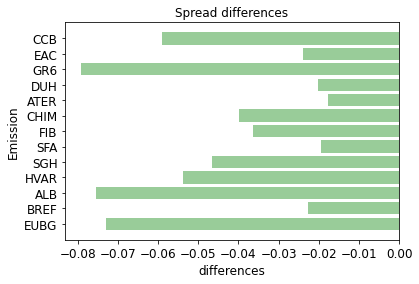

In [79]:
codies = emision_s.code
differenses = np.array(emision_s.differenses)
plt.barh(codies, differenses, color="green", alpha = 0.4)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Spread differences')
plt.ylabel('Emission', fontsize=12)
plt.xlabel('differences', fontsize=12)

plt.show()

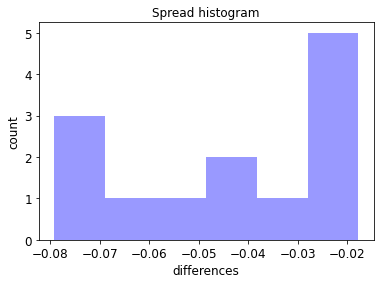

In [86]:
codies = emision_s.code
differenses = np.array(emision_s.differenses)
plt.hist(differenses, color="blue", bins=6, alpha = 0.4)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.title('Spread histogram')
plt.ylabel('count', fontsize=12)
plt.xlabel('differences', fontsize=12)
#хистограмите показват, че отклоненията на модела от 
#реалния резултат са винаги по-малки от нула и следователно модела надценява този показател
plt.show()

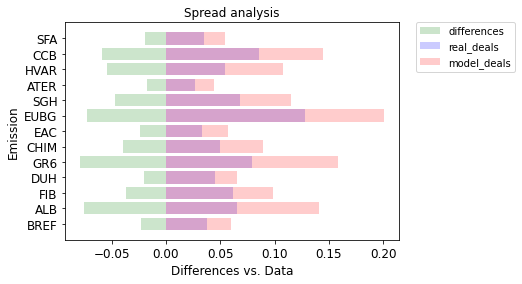

In [223]:
codies = emision_s.code
differenses = np.array(emision_s.differenses)
real_deals= np.array(emision_s.real_spread)
model_deals= np.array(emision_s.model_spread)
# plt.barh(x, y, color="green", label=combined_label)
plt.barh(codies, differenses, color="green",label='differences', alpha = 0.2)
plt.barh(codies, real_deals, color="blue", label='real_deals' , alpha = 0.2)
plt.barh(codies, model_deals, color="red", label='model_deals' ,alpha = 0.2)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
# plt.xlim([-1, 1])
# plt.xlim([-0.2, 0.2])
plt.title('Spread analysis')
plt.ylabel('Emission', fontsize=12)
plt.xlabel('Differences vs. Data', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

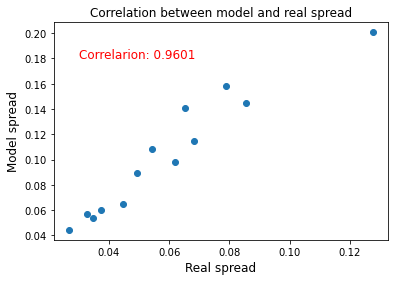

In [93]:
correlation = emision_s.real_spread.corr(emision_s.model_spread)
text_box_info = f'Correlarion: {correlation:.4f}'
plt.scatter(emision_s.real_spread,emision_s.model_spread )
plt.title('Correlation between model and real spread')
plt.ylabel('Model spread', fontsize=12)
plt.xlabel('Real spread', fontsize=12)
plt.text(0.03,0.18,text_box_info, fontsize=12, c = 'r')
plt.show()